IMPORT CSV FILE

In [ ]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('bbc.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis = 1)
df_new = df_new.drop(columns = 'category')
df_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
news = df_new['text'].values
label = df_new[['tech','business', 'sport', 'politics', 'entertainment']].values

In [ ]:
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size = 0.2)

In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token = 'x')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)

In [ ]:
sequence_train = tokenizer.texts_to_sequences(news_train)
sequence_test = tokenizer.texts_to_sequences(news_test)

In [ ]:
pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(5, activation = 'softmax')])

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAccuration both in training set and validation set has reach more than 90%.")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epoch = 50
history = model.fit(
    pad_train, label_train, epochs = num_epoch,
    validation_data = (pad_test, label_test),
    verbose = 2, callbacks = [callbacks])

Epoch 1/50
56/56 - 135s - loss: 1.6140 - accuracy: 0.2343 - val_loss: 1.5917 - val_accuracy: 0.3640
Epoch 2/50
56/56 - 139s - loss: 1.4724 - accuracy: 0.3702 - val_loss: 1.1679 - val_accuracy: 0.4180
Epoch 3/50
56/56 - 139s - loss: 1.1390 - accuracy: 0.5388 - val_loss: 0.8807 - val_accuracy: 0.6854
Epoch 4/50
56/56 - 140s - loss: 0.7085 - accuracy: 0.7449 - val_loss: 0.5716 - val_accuracy: 0.7618
Epoch 5/50
56/56 - 139s - loss: 0.4637 - accuracy: 0.8388 - val_loss: 0.7478 - val_accuracy: 0.6944
Epoch 6/50
56/56 - 139s - loss: 0.3166 - accuracy: 0.9107 - val_loss: 0.4556 - val_accuracy: 0.8337
Epoch 7/50
56/56 - 139s - loss: 0.2308 - accuracy: 0.9337 - val_loss: 0.4801 - val_accuracy: 0.8315
Epoch 8/50
56/56 - 139s - loss: 0.1364 - accuracy: 0.9669 - val_loss: 0.4055 - val_accuracy: 0.8989
Epoch 9/50
56/56 - 139s - loss: 0.0903 - accuracy: 0.9798 - val_loss: 0.4822 - val_accuracy: 0.8404
Epoch 10/50
56/56 - 139s - loss: 0.1476 - accuracy: 0.9607 - val_loss: 0.4871 - val_accuracy: 0.8607

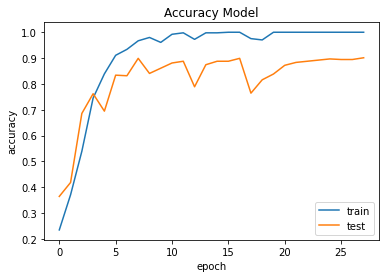

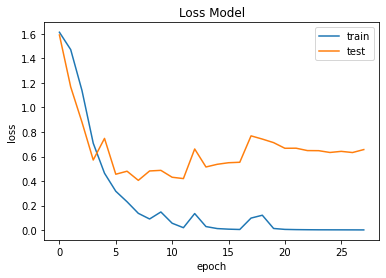

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()